# Dataframe of test season

Same steps as seen in the Cleaning_Labeling notebook but for a hold-out test set.

In [1]:
#turning relevent information from json file into pandas dataframe
import pandas as pd
import numpy as np
import json

def json_to_dataframe(json_file):
    """Converting json file into pandas dataframe from annotations section of the json file"""
    with open(json_file) as json_data:
        data=json.load(json_data)
    annot=data['annotations']
    annotations=pd.DataFrame(annot)
    annotations['image_id']=annotations['image_id']+'.JPG' #matching image id column to file names
    annotations.fillna(0,inplace=True)
    
    return annotations

In [2]:
annotations= json_to_dataframe('SnapshotSerengetiS04.json')
annotations

,sequence_level_annotation,id,category_id,seq_id,season,datetime,subject_id,count,standing,resting,moving,interacting,young_present,image_id,location
0,True,267ee3d3-955a-11e9-b6ff-000d3a198845,1,SER_S4#B03#1#1,S4,2011-12-30 14:58:44,ASG000c66z,1,0.47,0.00,0.07,0.47,0.0,S4/B03/B03_R1/S4_B03_R1_IMAG0001.JPG,B03
1,True,267ee3d4-955a-11e9-aeae-000d3a198845,1,SER_S4#B03#1#2,S4,2011-12-30 14:59:19,ASG000c6re,1,0.62,0.00,0.19,0.25,0.0,S4/B03/B03_R1/S4_B03_R1_IMAG0002.JPG,B03
2,True,267ee3d5-955a-11e9-8563-000d3a198845,1,SER_S4#B03#1#2,S4,2011-12-30 14:59:19,ASG000c6re,1,0.62,0.00,0.19,0.25,0.0,S4/B03/B03_R1/S4_B03_R1_IMAG0003.JPG,B03
3,True,267ee3d6-955a-11e9-ba0d-000d3a198845,1,SER_S4#B03#1#2,S4,2011-12-30 14:59:19,ASG000c6re,1,0.62,0.00,0.19,0.25,0.0,S4/B03/B03_R1/S4_B03_R1_IMAG0004.JPG,B03
4,True,267ee3d7-955a-11e9-8136-000d3a198845,0,SER_S4#B03#1#3,S4,2011-12-30 15:00:44,ASG000c64m,0,0.00,0.00,0.00,0.00,0.0,S4/B03/B03_R1/S4_B03_R1_IMAG0005.JPG,B03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541867,True,2b27ad45-955a-11e9-8141-000d3a198845,5,SER_S4#U13#2#1385,S4,2012-05-02 13:46:19,ASG000b66m,11-50,0.71,0.08,0.46,0.04,0.0,S4/U13/U13_R2/S4_U13_R2_IMAG3818.JPG,U13
541868,True,2b27ad46-955a-11e9-8515-000d3a198845,5,SER_S4#U13#2#1385,S4,2012-05-02 13:46:19,ASG000b66m,11-50,0.71,0.08,0.46,0.04,0.0,S4/U13/U13_R2/S4_U13_R2_IMAG3819.JPG,U13
541869,True,2b27ad47-955a-11e9-b3c6-000d3a198845,1,SER_S4#U13#2#1386,S4,2012-05-02 17:30:44,ASG000b5sk,1,0.29,0.46,0.17,0.08,0.0,S4/U13/U13_R2/S4_U13_R2_IMAG3820.JPG,U13
541870,True,2b27ad48-955a-11e9-b492-000d3a198845,1,SER_S4#U13#2#1386,S4,2012-05-02 17:30:44,ASG000b5sk,1,0.29,0.46,0.17,0.08,0.0,S4/U13/U13_R2/S4_U13_R2_IMAG3821.JPG,U13


In [3]:
#looking at all possible labels
with open('SnapshotSerengetiS04.json') as json_data:
    data=json.load(json_data)
cats=data['categories']
categories=pd.DataFrame(cats)
categories

,id,name
0,0,empty
1,1,human
2,2,gazellegrants
3,3,reedbuck
4,4,dikdik
...,...,...
56,56,hyenabrown
57,57,wilddog
58,58,kudu
59,59,pangolin


In [4]:
#looking at how the labels are distributed, may want to consider making this a graph for visualization purposes
annotations['category_id'].value_counts()

0     374102
18     69449
5      32386
16     11643
7       8930
15      8225
10      5658
23      4158
9       3925
13      3818
11      3452
1       3050
2       2851
17      2704
21      1228
8        944
40       781
32       768
37       559
3        439
29       397
24       344
22       313
4        285
39       205
36       165
35       136
20       134
27       127
26       110
38       107
33        99
14        78
19        57
12        50
6         46
31        40
34        32
28        18
30        15
46        11
47         9
48         9
42         6
41         4
25         3
43         2
Name: category_id, dtype: int64

In [5]:
#only 49 of the potential 61 labels are represented in the first season of images
annotations['category_id'].nunique()

47

In [6]:
annotations.drop(columns=['sequence_level_annotation','id','seq_id','subject_id']
                ,inplace=True)


In [7]:
#making sure there aren't rows for images that are missing
import os, random, math, glob
path=''
is_f=[]
for p in annotations.image_id.values:
    if os.path.isfile(path+p):
        is_f.append(1)
    else:
        is_f.append(0)
annotations['is_f']=is_f
annotations=annotations.loc[annotations.is_f==1]
annotations.shape

(538768, 12)

In [8]:
#checking value counts for labels, empty category is significantly larger than all others
annotations['category_id'].value_counts()

0     374100
18     69443
5      32368
16     11643
7       8924
15      8224
10      5655
23      4155
9       3922
13      3818
11      3446
2       2851
17      2704
21      1222
8        944
40       781
32       768
37       559
3        439
29       397
24       344
22       313
4        285
39       205
36       165
35       136
20       134
27       127
26       110
38       107
33        99
14        78
19        57
12        50
6         46
31        40
34        32
28        18
30        15
46        11
47         9
48         9
42         6
41         4
25         3
43         2
Name: category_id, dtype: int64

In [9]:
#annot_full has extra information I don't necessarily need for the image classification I want to start with but
#may be useful for future work
annotations.reset_index(inplace=True)
annotations.drop(columns=['is_f','index'],inplace=True)
annotations

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,category_id,season,datetime,count,standing,resting,moving,interacting,young_present,image_id,location
0,0,S4,2011-12-30 15:00:44,0,0.00,0.00,0.00,0.00,0.00,S4/B03/B03_R1/S4_B03_R1_IMAG0005.JPG,B03
1,0,S4,2011-12-30 15:00:44,0,0.00,0.00,0.00,0.00,0.00,S4/B03/B03_R1/S4_B03_R1_IMAG0006.JPG,B03
2,0,S4,2011-12-30 15:00:44,0,0.00,0.00,0.00,0.00,0.00,S4/B03/B03_R1/S4_B03_R1_IMAG0007.JPG,B03
3,0,S4,2011-12-30 15:02:08,0,0.00,0.00,0.00,0.00,0.00,S4/B03/B03_R1/S4_B03_R1_IMAG0008.JPG,B03
4,0,S4,2011-12-30 15:02:08,0,0.00,0.00,0.00,0.00,0.00,S4/B03/B03_R1/S4_B03_R1_IMAG0009.JPG,B03
...,...,...,...,...,...,...,...,...,...,...,...
538763,5,S4,2012-05-02 13:44:49,11-50,0.65,0.00,0.59,0.29,0.18,S4/U13/U13_R2/S4_U13_R2_IMAG3815.JPG,U13
538764,5,S4,2012-05-02 13:44:49,11-50,0.65,0.00,0.59,0.29,0.18,S4/U13/U13_R2/S4_U13_R2_IMAG3816.JPG,U13
538765,5,S4,2012-05-02 13:46:19,11-50,0.71,0.08,0.46,0.04,0.00,S4/U13/U13_R2/S4_U13_R2_IMAG3817.JPG,U13
538766,5,S4,2012-05-02 13:46:19,11-50,0.71,0.08,0.46,0.04,0.00,S4/U13/U13_R2/S4_U13_R2_IMAG3818.JPG,U13


In [10]:
#simplified dataframe
labels= annotations[['category_id','season','datetime','count','image_id']].copy()
labels

,category_id,season,datetime,count,image_id
0,0,S4,2011-12-30 15:00:44,0,S4/B03/B03_R1/S4_B03_R1_IMAG0005.JPG
1,0,S4,2011-12-30 15:00:44,0,S4/B03/B03_R1/S4_B03_R1_IMAG0006.JPG
2,0,S4,2011-12-30 15:00:44,0,S4/B03/B03_R1/S4_B03_R1_IMAG0007.JPG
3,0,S4,2011-12-30 15:02:08,0,S4/B03/B03_R1/S4_B03_R1_IMAG0008.JPG
4,0,S4,2011-12-30 15:02:08,0,S4/B03/B03_R1/S4_B03_R1_IMAG0009.JPG
...,...,...,...,...,...
538763,5,S4,2012-05-02 13:44:49,11-50,S4/U13/U13_R2/S4_U13_R2_IMAG3815.JPG
538764,5,S4,2012-05-02 13:44:49,11-50,S4/U13/U13_R2/S4_U13_R2_IMAG3816.JPG
538765,5,S4,2012-05-02 13:46:19,11-50,S4/U13/U13_R2/S4_U13_R2_IMAG3817.JPG
538766,5,S4,2012-05-02 13:46:19,11-50,S4/U13/U13_R2/S4_U13_R2_IMAG3818.JPG


In [11]:
#adding in label names to go with catefory_id numerical value
categories.rename(columns={'id':'category_id','name':'species'},inplace=True)
species_labels=categories.merge(labels,on='category_id')
species_labels

,category_id,species,season,datetime,count,image_id
0,0,empty,S4,2011-12-30 15:00:44,0,S4/B03/B03_R1/S4_B03_R1_IMAG0005.JPG
1,0,empty,S4,2011-12-30 15:00:44,0,S4/B03/B03_R1/S4_B03_R1_IMAG0006.JPG
2,0,empty,S4,2011-12-30 15:00:44,0,S4/B03/B03_R1/S4_B03_R1_IMAG0007.JPG
3,0,empty,S4,2011-12-30 15:02:08,0,S4/B03/B03_R1/S4_B03_R1_IMAG0008.JPG
4,0,empty,S4,2011-12-30 15:02:08,0,S4/B03/B03_R1/S4_B03_R1_IMAG0009.JPG
...,...,...,...,...,...,...
538763,48,reptiles,S4,2012-03-16 13:12:54,1,S4/O09/O09_R2/S4_O09_R2_IMAG0704.JPG
538764,48,reptiles,S4,2012-03-16 13:12:54,1,S4/O09/O09_R2/S4_O09_R2_IMAG0705.JPG
538765,48,reptiles,S4,2012-03-25 11:29:13,1,S4/U13/U13_R2/S4_U13_R2_IMAG1601.JPG
538766,48,reptiles,S4,2012-03-25 11:29:13,1,S4/U13/U13_R2/S4_U13_R2_IMAG1602.JPG


In [12]:
species_labels.reset_index(inplace=True)
species_labels

,index,category_id,species,season,datetime,count,image_id
0,0,0,empty,S4,2011-12-30 15:00:44,0,S4/B03/B03_R1/S4_B03_R1_IMAG0005.JPG
1,1,0,empty,S4,2011-12-30 15:00:44,0,S4/B03/B03_R1/S4_B03_R1_IMAG0006.JPG
2,2,0,empty,S4,2011-12-30 15:00:44,0,S4/B03/B03_R1/S4_B03_R1_IMAG0007.JPG
3,3,0,empty,S4,2011-12-30 15:02:08,0,S4/B03/B03_R1/S4_B03_R1_IMAG0008.JPG
4,4,0,empty,S4,2011-12-30 15:02:08,0,S4/B03/B03_R1/S4_B03_R1_IMAG0009.JPG
...,...,...,...,...,...,...,...
538763,538763,48,reptiles,S4,2012-03-16 13:12:54,1,S4/O09/O09_R2/S4_O09_R2_IMAG0704.JPG
538764,538764,48,reptiles,S4,2012-03-16 13:12:54,1,S4/O09/O09_R2/S4_O09_R2_IMAG0705.JPG
538765,538765,48,reptiles,S4,2012-03-25 11:29:13,1,S4/U13/U13_R2/S4_U13_R2_IMAG1601.JPG
538766,538766,48,reptiles,S4,2012-03-25 11:29:13,1,S4/U13/U13_R2/S4_U13_R2_IMAG1602.JPG


In [13]:
species_labels.drop(columns=['index'],inplace=True)
species_labels

,category_id,species,season,datetime,count,image_id
0,0,empty,S4,2011-12-30 15:00:44,0,S4/B03/B03_R1/S4_B03_R1_IMAG0005.JPG
1,0,empty,S4,2011-12-30 15:00:44,0,S4/B03/B03_R1/S4_B03_R1_IMAG0006.JPG
2,0,empty,S4,2011-12-30 15:00:44,0,S4/B03/B03_R1/S4_B03_R1_IMAG0007.JPG
3,0,empty,S4,2011-12-30 15:02:08,0,S4/B03/B03_R1/S4_B03_R1_IMAG0008.JPG
4,0,empty,S4,2011-12-30 15:02:08,0,S4/B03/B03_R1/S4_B03_R1_IMAG0009.JPG
...,...,...,...,...,...,...
538763,48,reptiles,S4,2012-03-16 13:12:54,1,S4/O09/O09_R2/S4_O09_R2_IMAG0704.JPG
538764,48,reptiles,S4,2012-03-16 13:12:54,1,S4/O09/O09_R2/S4_O09_R2_IMAG0705.JPG
538765,48,reptiles,S4,2012-03-25 11:29:13,1,S4/U13/U13_R2/S4_U13_R2_IMAG1601.JPG
538766,48,reptiles,S4,2012-03-25 11:29:13,1,S4/U13/U13_R2/S4_U13_R2_IMAG1602.JPG


In [14]:
#checking labeling and image path
from PIL import Image

def look_at_those_animals(species_type,random_state):
    image_ids=species_labels[species_labels['species']==species_type]['image_id']
    print(image_ids.shape)
    image=image_ids.sample(random_state=random_state).values[0]
    print(image)
    IM=Image.open('{}'.format(image),'r')
    return IM

(3818,)
S4/B10/B10_R1/S4_B10_R1_IMAG0409.JPG


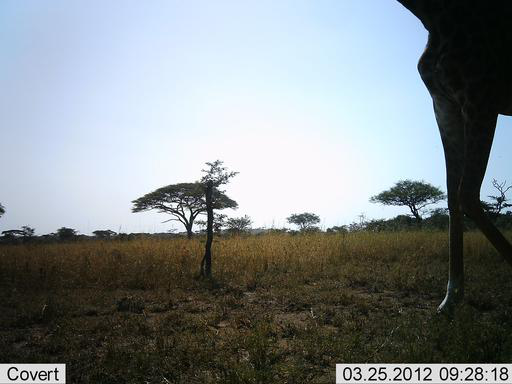

In [15]:
look_at_those_animals('giraffe',11)

(9,)
S4/U13/U13_R2/S4_U13_R2_IMAG1602.JPG


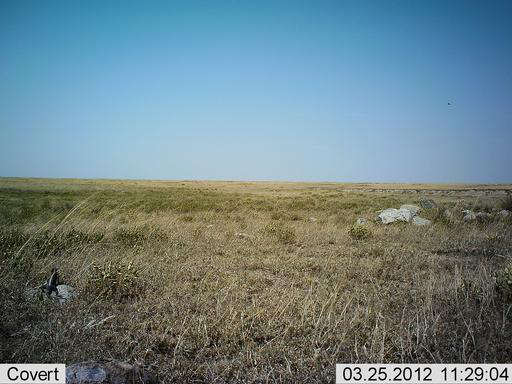

In [16]:
look_at_those_animals('reptiles',11)

In [17]:
species_labels.to_csv('test.csv')